In [3]:
%matplotlib inline
import numpy as np 
import pandas as pd 
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import warnings
warnings.filterwarnings('ignore')

In [4]:
# 数据读取
path = 'I:/old_cars/data/'
Train_data = pd.read_csv(path + 'used_car_train_20200313.csv', sep=' ')
Test_data = pd.read_csv(path + 'used_car_testA_20200313.csv', sep=' ')

In [37]:
#显示所有列
pd.set_option('display.max_columns', None)
#显示所有行
pd.set_option('display.max_rows', None)
#设置value的显示长度为100，默认为50
pd.set_option('max_colwidth',100)
# 查看数据head（）+tail()
Train_data.head().append(Train_data.tail())

,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,notRepairedDamage,regionCode,seller,offerType,creatDate,price,v_0,v_1,v_2,v_3,v_4,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14
0,0,736,20040402,30.0,6,1.0,0.0,0.0,60,12.5,0.0,1046,0,0,20160404,1850,43.357796,3.966344,0.050257,2.159744,1.143786,0.235676,0.101988,0.129549,0.022816,0.097462,-2.881803,2.804097,-2.420821,0.795292,0.914762
1,1,2262,20030301,40.0,1,2.0,0.0,0.0,0,15.0,-,4366,0,0,20160309,3600,45.305273,5.236112,0.137925,1.380657,-1.422165,0.264777,0.121004,0.135731,0.026597,0.020582,-4.900482,2.096338,-1.030483,-1.722674,0.245522
2,2,14874,20040403,115.0,15,1.0,0.0,0.0,163,12.5,0.0,2806,0,0,20160402,6222,45.978359,4.823792,1.319524,-0.998467,-0.996911,0.251410,0.114912,0.165147,0.062173,0.027075,-4.846749,1.803559,1.565330,-0.832687,-0.229963
3,3,71865,19960908,109.0,10,0.0,0.0,1.0,193,15.0,0.0,434,0,0,20160312,2400,45.687478,4.492574,-0.050616,0.883600,-2.228079,0.274293,0.110300,0.121964,0.033395,0.000000,-4.509599,1.285940,-0.501868,-2.438353,-0.478699
4,4,111080,20120103,110.0,5,1.0,0.0,0.0,68,5.0,0.0,6977,0,0,20160313,5200,44.383511,2.031433,0.572169,-1.571239,2.246088,0.228036,0.073205,0.091880,0.078819,0.121534,-1.896240,0.910783,0.931110,2.834518,1.923482
149995,149995,163978,20000607,121.0,10,4.0,0.0,1.0,163,15.0,0.0,4576,0,0,20160327,5900,45.316543,-3.139095,-1.269707,-0.736609,-1.505820,0.280264,0.000310,0.048441,0.071158,0.019174,1.988114,-2.983973,0.589167,-1.304370,-0.302592
149996,149996,184535,20091102,116.0,11,0.0,0.0,0.0,125,10.0,0.0,2826,0,0,20160312,9500,45.972058,-3.143764,-0.023523,-2.366699,0.698012,0.253217,0.000777,0.084079,0.099681,0.079371,1.839166,-2.774615,2.553994,0.924196,-0.272160
149997,149997,147587,20101003,60.0,11,1.0,1.0,0.0,90,6.0,0.0,3302,0,0,20160328,7500,44.733481,-3.105721,0.595454,-2.279091,1.423661,0.233353,0.000705,0.118872,0.100118,0.097914,2.439812,-1.630677,2.290197,1.891922,0.414931
149998,149998,45907,20060312,34.0,10,3.0,1.0,0.0,156,15.0,0.0,1877,0,0,20160401,4999,45.658634,-3.204785,-0.441680,-1.179812,0.620680,0.256369,0.000252,0.081479,0.083558,0.081498,2.075380,-2.633719,1.414937,0.431981,-1.659014
149999,149999,177672,19990204,19.0,28,6.0,0.0,1.0,193,12.5,0.0,235,0,0,20160305,4700,45.536383,-3.200326,-1.612893,-0.067144,-1.396166,0.284475,0.000000,0.040072,0.062543,0.025819,1.978453,-3.179913,0.031724,-1.483350,-0.342674


In [38]:
Test_data.head().append(Test_data.tail())

,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,notRepairedDamage,regionCode,seller,offerType,creatDate,v_0,v_1,v_2,v_3,v_4,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14
0,150000,66932,20111212,222.0,4,5.0,1.0,1.0,313,15.0,0.0,1440,0,0,20160329,49.593127,5.246568,1.001130,-4.122264,0.737532,0.264405,0.121800,0.070899,0.106558,0.078867,-7.050969,-0.854626,4.800151,0.620011,-3.664654
1,150001,174960,19990211,19.0,21,0.0,0.0,0.0,75,12.5,1.0,5419,0,0,20160404,42.395926,-3.253950,-1.753754,3.646605,-0.725597,0.261745,0.000000,0.096733,0.013705,0.052383,3.679418,-0.729039,-3.796107,-1.541230,-0.757055
2,150002,5356,20090304,82.0,21,0.0,0.0,0.0,109,7.0,0.0,5045,0,0,20160308,45.841370,4.704178,0.155391,-1.118443,-0.229160,0.260216,0.112081,0.078082,0.062078,0.050540,-4.926690,1.001106,0.826562,0.138226,0.754033
3,150003,50688,20100405,0.0,0,0.0,0.0,1.0,160,7.0,0.0,4023,0,0,20160325,46.440649,4.319155,0.428897,-2.037916,-0.234757,0.260466,0.106727,0.081146,0.075971,0.048268,-4.864637,0.505493,1.870379,0.366038,1.312775
4,150004,161428,19970703,26.0,14,2.0,0.0,0.0,75,15.0,0.0,3103,0,0,20160309,42.184604,-3.166234,-1.572058,2.604143,0.387498,0.250999,0.000000,0.077806,0.028600,0.081709,3.616475,-0.673236,-3.197685,-0.025678,-0.101290
49995,199995,20903,19960503,4.0,4,4.0,0.0,0.0,116,15.0,0.0,3219,0,0,20160320,45.621391,5.958453,-0.918571,0.774826,-2.021739,0.284664,0.130044,0.049833,0.028807,0.004616,-5.978511,1.303174,-1.207191,-1.981240,-0.357695
49996,199996,708,19991011,0.0,0,0.0,0.0,0.0,75,15.0,0.0,1857,0,0,20160329,43.935162,4.476841,-0.841710,1.328253,-1.292675,0.268101,0.108095,0.066039,0.025468,0.025971,-3.913825,1.759524,-2.075658,-1.154847,0.169073
49997,199997,6693,20040412,49.0,1,0.0,1.0,1.0,224,15.0,0.0,3452,0,0,20160305,46.537137,4.170806,0.388595,-0.704689,-1.480710,0.269432,0.105724,0.117652,0.057479,0.015669,-4.639065,0.654713,1.137756,-1.390531,0.254420
49998,199998,96900,20020008,27.0,1,0.0,0.0,1.0,334,15.0,0.0,1998,0,0,20160404,46.771359,-3.296814,0.243566,-1.277411,-0.404881,0.261152,0.000490,0.137366,0.086216,0.051383,1.833504,-2.828687,2.465630,-0.911682,-2.057353
49999,199999,193384,20041109,166.0,6,1.0,NaN,1.0,68,9.0,0.0,3276,0,0,20160322,43.731010,-3.121867,0.027348,-0.808914,2.116551,0.228730,0.000300,0.103534,0.080625,0.124264,2.914571,-1.135270,0.547628,2.094057,-1.552150


In [39]:
Train_data[:50]

,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,notRepairedDamage,regionCode,seller,offerType,creatDate,price,v_0,v_1,v_2,v_3,v_4,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14
0,0,736,20040402,30.0,6,1.0,0.0,0.0,60,12.5,0.0,1046,0,0,20160404,1850,43.357796,3.966344,0.050257,2.159744,1.143786,0.235676,0.101988,0.129549,0.022816,0.097462,-2.881803,2.804097,-2.420821,0.795292,0.914762
1,1,2262,20030301,40.0,1,2.0,0.0,0.0,0,15.0,-,4366,0,0,20160309,3600,45.305273,5.236112,0.137925,1.380657,-1.422165,0.264777,0.121004,0.135731,0.026597,0.020582,-4.900482,2.096338,-1.030483,-1.722674,0.245522
2,2,14874,20040403,115.0,15,1.0,0.0,0.0,163,12.5,0.0,2806,0,0,20160402,6222,45.978359,4.823792,1.319524,-0.998467,-0.996911,0.251410,0.114912,0.165147,0.062173,0.027075,-4.846749,1.803559,1.565330,-0.832687,-0.229963
3,3,71865,19960908,109.0,10,0.0,0.0,1.0,193,15.0,0.0,434,0,0,20160312,2400,45.687478,4.492574,-0.050616,0.883600,-2.228079,0.274293,0.110300,0.121964,0.033395,0.000000,-4.509599,1.285940,-0.501868,-2.438353,-0.478699
4,4,111080,20120103,110.0,5,1.0,0.0,0.0,68,5.0,0.0,6977,0,0,20160313,5200,44.383511,2.031433,0.572169,-1.571239,2.246088,0.228036,0.073205,0.091880,0.078819,0.121534,-1.896240,0.910783,0.931110,2.834518,1.923482
5,5,137642,20090602,24.0,10,0.0,1.0,0.0,109,10.0,0.0,3690,0,0,20160319,8000,46.323165,-3.229285,0.156615,-1.727217,-0.345690,0.260246,0.000518,0.119838,0.090922,0.048769,1.885526,-2.721943,2.457660,-0.286973,0.206573
6,6,2402,19990411,13.0,4,0.0,0.0,1.0,150,15.0,0.0,3073,0,0,20160317,3500,46.104335,4.926219,0.113311,1.644606,-1.270381,0.267998,0.117675,0.142334,0.025446,0.028174,-4.902200,1.610616,-0.834605,-1.996117,-0.103180
7,7,165346,19990706,26.0,14,1.0,0.0,0.0,101,15.0,0.0,4000,0,0,20160326,1000,42.255586,-3.167771,-0.676693,1.942673,0.524206,0.239506,0.000000,0.122943,0.039839,0.082413,3.693829,-0.245014,-2.192810,0.236728,0.195567
8,8,2974,20030205,19.0,1,2.0,1.0,1.0,179,15.0,0.0,4679,0,0,20160326,2850,46.084888,4.893717,0.475333,0.556575,-1.262490,0.263833,0.116583,0.144255,0.039851,0.024388,-4.925234,1.587796,0.075348,-1.551098,0.069433
9,9,82021,19980101,7.0,7,5.0,0.0,0.0,88,15.0,0.0,302,0,0,20160402,650,43.074626,1.666386,-2.201545,3.096861,0.843852,0.262473,0.068267,0.012176,0.010291,0.098727,-1.089584,0.600683,-4.186210,0.198273,-1.025822


In [40]:
print(Train_data.shape,Test_data.shape)

(150000, 31) (50000, 30)


In [41]:
Train_data.describe()

,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,regionCode,seller,offerType,creatDate,price,v_0,v_1,v_2,v_3,v_4,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14
count,150000.000000,150000.000000,1.500000e+05,149999.000000,150000.000000,145494.000000,141320.000000,144019.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.0,1.500000e+05,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000
mean,74999.500000,68349.172873,2.003417e+07,47.129021,8.052733,1.792369,0.375842,0.224943,119.316547,12.597160,2583.077267,0.000007,0.0,2.016033e+07,5923.327333,44.406268,-0.044809,0.080765,0.078833,0.017875,0.248204,0.044923,0.124692,0.058144,0.061996,-0.001000,0.009035,0.004813,0.000313,-0.000688
std,43301.414527,61103.875095,5.364988e+04,49.536040,7.864956,1.760640,0.548677,0.417546,177.168419,3.919576,1885.363218,0.002582,0.0,1.067328e+02,7501.998477,2.457548,3.641893,2.929618,2.026514,1.193661,0.045804,0.051743,0.201410,0.029186,0.035692,3.772386,3.286071,2.517478,1.288988,1.038685
min,0.000000,0.000000,1.991000e+07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000,0.000000,0.0,2.015062e+07,11.000000,30.451976,-4.295589,-4.470671,-7.275037,-4.364565,0.000000,0.000000,0.000000,0.000000,0.000000,-9.168192,-5.558207,-9.639552,-4.153899,-6.546556
25%,37499.750000,11156.000000,1.999091e+07,10.000000,1.000000,0.000000,0.000000,0.000000,75.000000,12.500000,1018.000000,0.000000,0.0,2.016031e+07,1300.000000,43.135799,-3.192349,-0.970671,-1.462580,-0.921191,0.243615,0.000038,0.062474,0.035334,0.033930,-3.722303,-1.951543,-1.871846,-1.057789,-0.437034
50%,74999.500000,51638.000000,2.003091e+07,30.000000,6.000000,1.000000,0.000000,0.000000,110.000000,15.000000,2196.000000,0.000000,0.0,2.016032e+07,3250.000000,44.610266,-3.052671,-0.382947,0.099722,-0.075910,0.257798,0.000812,0.095866,0.057014,0.058484,1.624076,-0.358053,-0.130753,-0.036245,0.141246
75%,112499.250000,118841.250000,2.007111e+07,66.000000,13.000000,3.000000,1.000000,0.000000,150.000000,15.000000,3843.000000,0.000000,0.0,2.016033e+07,7700.000000,46.004721,4.000670,0.241335,1.565838,0.868758,0.265297,0.102009,0.125243,0.079382,0.087491,2.844357,1.255022,1.776933,0.942813,0.680378
max,149999.000000,196812.000000,2.015121e+07,247.000000,39.000000,7.000000,6.000000,1.000000,19312.000000,15.000000,8120.000000,1.000000,0.0,2.016041e+07,99999.000000,52.304178,7.320308,19.035496,9.854702,6.829352,0.291838,0.151420,1.404936,0.160791,0.222787,12.357011,18.819042,13.847792,11.147669,8.658418


In [42]:
Test_data.describe()

,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,regionCode,seller,offerType,creatDate,v_0,v_1,v_2,v_3,v_4,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14
count,50000.000000,50000.000000,5.000000e+04,50000.000000,50000.000000,48587.000000,47107.000000,48090.000000,50000.000000,50000.000000,50000.000000,50000.0,50000.0,5.000000e+04,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,174999.500000,68542.223280,2.003393e+07,46.844520,8.056240,1.782185,0.373405,0.224350,119.883620,12.595580,2590.604820,0.0,0.0,2.016033e+07,44.418233,-0.037238,0.050534,0.084640,0.015001,0.248669,0.045021,0.122744,0.057997,0.062000,-0.017855,-0.013742,-0.013554,-0.003147,0.001516
std,14433.901067,61052.808133,5.368870e+04,49.469548,7.819477,1.760736,0.546442,0.417158,185.097387,3.908979,1876.970263,0.0,0.0,7.951521e+01,2.429950,3.642562,2.856341,2.026510,1.193026,0.044601,0.051766,0.195972,0.029211,0.035653,3.747985,3.231258,2.515962,1.286597,1.027360
min,150000.000000,0.000000,1.991000e+07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000,0.0,0.0,2.015061e+07,28.987024,-4.137733,-4.205728,-5.638184,-4.287718,0.000000,0.000000,0.000000,0.000000,0.000000,-9.160049,-5.411964,-8.916949,-4.123333,-6.112667
25%,162499.750000,11203.500000,1.999091e+07,10.000000,1.000000,0.000000,0.000000,0.000000,75.000000,12.500000,1030.000000,0.0,0.0,2.016031e+07,43.139621,-3.191909,-0.971266,-1.453453,-0.928089,0.243762,0.000044,0.062644,0.035084,0.033714,-3.700121,-1.971325,-1.876703,-1.060428,-0.437920
50%,174999.500000,52248.500000,2.003091e+07,29.000000,6.000000,1.000000,0.000000,0.000000,109.000000,15.000000,2219.000000,0.0,0.0,2.016032e+07,44.611084,-3.050756,-0.388117,0.097881,-0.070225,0.257877,0.000815,0.095828,0.057084,0.058764,1.613212,-0.355843,-0.142779,-0.035956,0.138799
75%,187499.250000,118856.500000,2.007110e+07,65.000000,13.000000,3.000000,1.000000,0.000000,150.000000,15.000000,3857.000000,0.0,0.0,2.016033e+07,45.992639,3.997323,0.240548,1.562700,0.863731,0.265328,0.102025,0.125438,0.079077,0.087489,2.832708,1.262914,1.764335,0.941469,0.681163
max,199999.000000,196805.000000,2.015121e+07,246.000000,39.000000,7.000000,6.000000,1.000000,20000.000000,15.000000,8121.000000,0.0,0.0,2.016041e+07,51.751684,7.553517,18.394570,9.381599,5.270150,0.291618,0.153265,1.358813,0.156355,0.214775,12.338872,18.856218,12.950498,5.913273,2.624622


In [43]:
Train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 31 columns):
SaleID               150000 non-null int64
name                 150000 non-null int64
regDate              150000 non-null int64
model                149999 non-null float64
brand                150000 non-null int64
bodyType             145494 non-null float64
fuelType             141320 non-null float64
gearbox              144019 non-null float64
power                150000 non-null int64
kilometer            150000 non-null float64
notRepairedDamage    150000 non-null object
regionCode           150000 non-null int64
seller               150000 non-null int64
offerType            150000 non-null int64
creatDate            150000 non-null int64
price                150000 non-null int64
v_0                  150000 non-null float64
v_1                  150000 non-null float64
v_2                  150000 non-null float64
v_3                  150000 non-null float64
v_4       

In [44]:
# 检查各种类型特征占用内存情况
for dtype in ['float', 'int', 'object']:
    selected_dtype = Train_data.select_dtypes(include=[dtype])
    mean_usage_b = selected_dtype.memory_usage(deep=True).mean()
    mean_usage_mb = mean_usage_b/1024**2
    print('averagy memory usage for {} columns {:03.2f} Mb'.format(dtype, mean_usage_mb))
                                               


averagy memory usage for float columns 1.09 Mb
averagy memory usage for int columns 0.00 Mb
averagy memory usage for object columns 4.27 Mb


In [45]:
Test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 30 columns):
SaleID               50000 non-null int64
name                 50000 non-null int64
regDate              50000 non-null int64
model                50000 non-null float64
brand                50000 non-null int64
bodyType             48587 non-null float64
fuelType             47107 non-null float64
gearbox              48090 non-null float64
power                50000 non-null int64
kilometer            50000 non-null float64
notRepairedDamage    50000 non-null object
regionCode           50000 non-null int64
seller               50000 non-null int64
offerType            50000 non-null int64
creatDate            50000 non-null int64
v_0                  50000 non-null float64
v_1                  50000 non-null float64
v_2                  50000 non-null float64
v_3                  50000 non-null float64
v_4                  50000 non-null float64
v_5                  50000 non

In [5]:
Train_data[Train_data['model'].isnull().values==True].index.tolist()

[38424]

In [46]:
Train_data[Train_data['model'].isnull().values==True]

,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,notRepairedDamage,regionCode,seller,offerType,creatDate,price,v_0,v_1,v_2,v_3,v_4,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14
38424,38424,148730,20150809,NaN,37,6.0,1.0,1.0,190,2.0,0.0,1425,0,0,20160320,47950,41.139365,-2.167089,-3.436008,-7.275037,6.829352,0.181562,0.002092,0.0,0.148487,0.222787,1.6757,-3.25056,0.876001,11.147669,8.658418


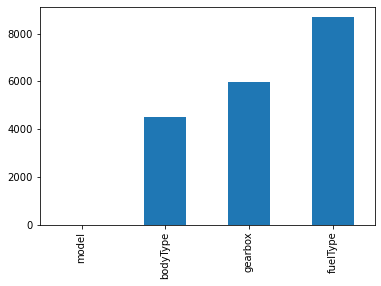

In [47]:
import missingno as msno
# nan可视化
missing = Train_data.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(inplace=True)
missing.plot.bar()

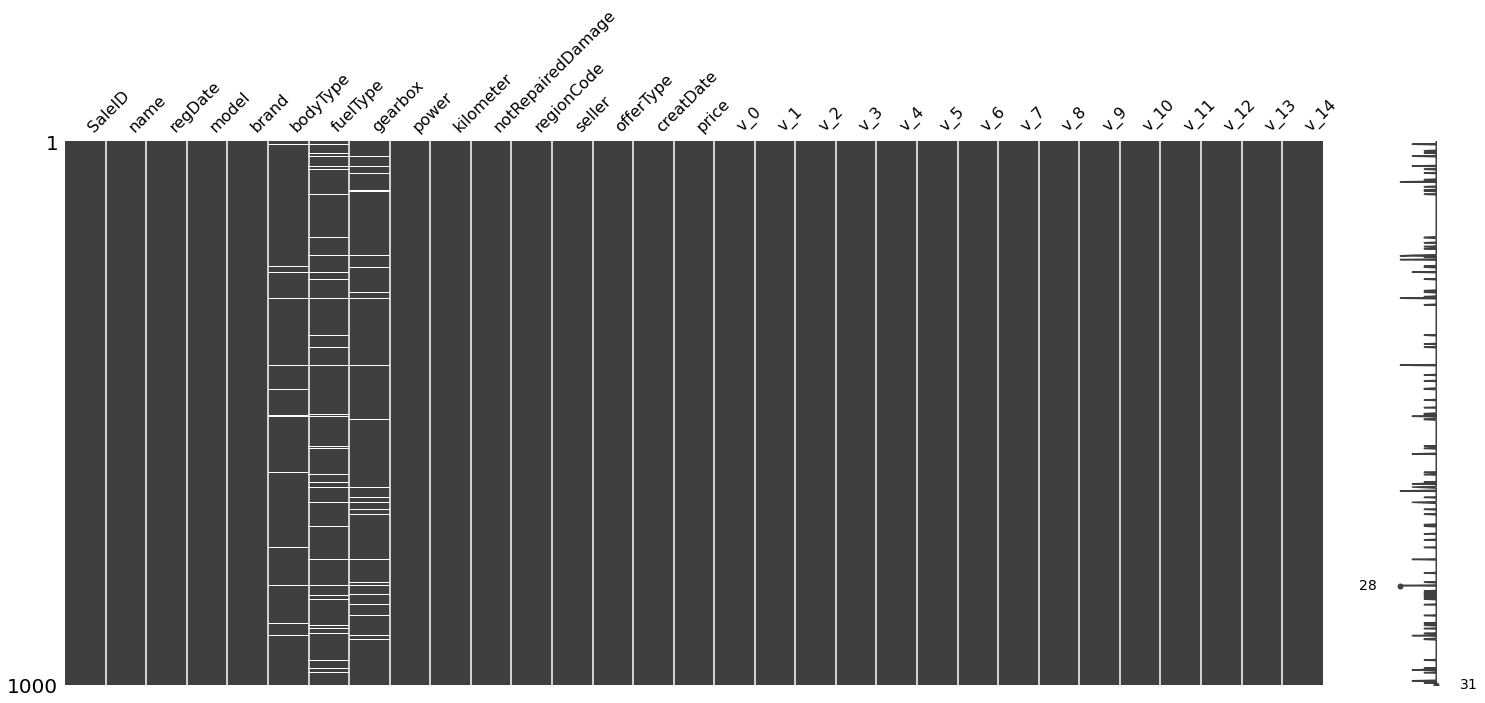

In [48]:
# 查看缺省值
msno.matrix(Train_data.sample(1000))

In [49]:
# Train_data['model'].value_counts()

In [50]:
price = np.array(Train_data['price'])
price_clean = price[~np.isnan(price)]
# 计算最佳λ值
l, opt_lambda = st.boxcox(price_clean)
print('Optimal lambda value:', opt_lambda)

# 进行Box-Cox变换
Train_data['price_boxcox'] = st.boxcox(Train_data['price'],lmbda=opt_lambda)

Optimal lambda value: 0.0818509672675628


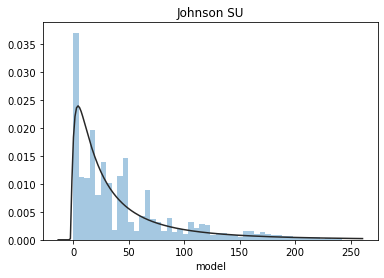

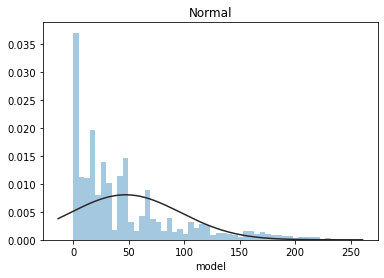

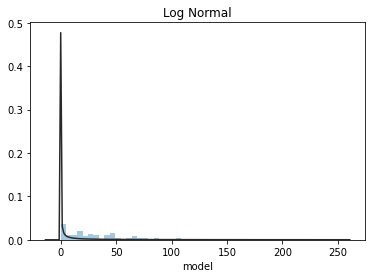

In [51]:
y = Train_data['model']
plt.figure(1); plt.title('Johnson SU')
sns.distplot(y, kde=False, fit=st.johnsonsu)
plt.figure(2); plt.title('Normal')
sns.distplot(y, kde=False, fit=st.norm)
plt.figure(3); plt.title('Log Normal')
sns.distplot(y, kde=False, fit=st.lognorm)

In [52]:
Train_data['model'] = Train_data['model'].apply(np.log)
print(Train_data['model'][:10])

0    3.401197
1    3.688879
2    4.744932
3    4.691348
4    4.700480
5    3.178054
6    2.564949
7    3.258097
8    2.944439
9    1.945910
Name: model, dtype: float64


In [53]:
Train_data['model'].isnull().sum()

1

In [54]:
date_cols = ['regDate', 'creatDate']
cate_cols = ['name', 'model', 'brand', 'bodyType', 'fuelType', 'gearbox', 'notRepairedDamage', 'regionCode', 'seller', 'offerType']
num_cols = ['power', 'kilometer'] + ['v_{}'.format(i) for i in range(15)]
cols = date_cols + cate_cols + num_cols

tmp = pd.DataFrame()
tmp['count'] = Train_data[cols].count().values
tmp['missing_counts'] = Train_data.shape[0] - tmp['count']
tmp['missing_rate'] = (Train_data.shape[0] - tmp['count']) / Train_data.shape[0]
tmp['nunique'] = Train_data[cols].nunique().values
tmp['max_value_counts'] = [Train_data[f].value_counts().values[0] for f in cols]
tmp['max_value_counts_prop'] = tmp['max_value_counts'] / Train_data.shape[0]
tmp['max_value_counts_value'] = [Train_data[f].value_counts().index[0] for f in cols]
tmp.index = cols
tmp

,count,missing_counts,missing_rate,nunique,max_value_counts,max_value_counts_prop,max_value_counts_value
regDate,150000,0,0.000000,3894,180,0.001200,20000008
creatDate,150000,0,0.000000,96,5848,0.038987,20160403
name,150000,0,0.000000,99662,282,0.001880,708
model,149999,1,0.000007,248,11762,0.078413,-inf
brand,150000,0,0.000000,40,31480,0.209867,0
bodyType,145494,4506,0.030040,8,41420,0.276133,0
fuelType,141320,8680,0.057867,7,91656,0.611040,0
gearbox,144019,5981,0.039873,2,111623,0.744153,0
notRepairedDamage,150000,0,0.000000,3,111361,0.742407,0.0
regionCode,150000,0,0.000000,7905,369,0.002460,419


把日期列处理一下，提取年、月、日、星期等信息。这里有些日期异常的样本，月份出现了0，因此需要开个函数单独处理一下。

In [55]:
# from datetime import datetime
# from tqdm import tqdm
# # 小于1月份的为1月份
# def date_proc(x):
#     y = int(str(x)[0:4])
#     m = int(str(x)[4:6])
#     d = int(str(x)[6:8])
#     if m < 1:
#         m = 1
#     date = datetime(y, m, d)
#     return date


# for f in tqdm(date_cols):
#     Train_data[f] = Train_data[f].apply(date_proc)
#     Train_data[f + '_year'] = Train_data[f].dt.year
#     Train_data[f + '_month'] = Train_data[f].dt.month
#     Train_data[f + '_day'] = Train_data[f].dt.day
#     Train_data[f + '_dayofweek'] = Train_data[f].dt.dayofweek
# Train_data.keys()

In [56]:
age = []
for i in range(len(Train_data)):
    age0 = Train_data.creatDate[i] - Train_data.regDate[i]
    age1 = round((age0//10000 + (age0/1000-age0//10000*10)/12)*365, 1)
    age.append(age1)

In [57]:
Train_data['used_time'] = age

来看一下各个数值特征跟price的相关性。跟price相关性比较高的有汽车注册年份（regDate_year），应该可以理解为车越新，价格越高；汽车已行驶公里数（kilometer）也还行，应该可以理解为跑的路程越多，车就越旧，价格就越低；匿名特征里面的v_0、v_3、v_8、v_12看起来跟price的相关性很高，原因就不知道了。除了跟price的相关性，还可以发现有些特征跟特征之间的相关性也很高，比如v_1跟v_6、v_2跟v_7、v_3跟v_8、v_4跟v_9等，这些特征之间可能存在冗余现象，训练的时候可以依据效果尝试去掉一部分，或者拆分成两部分，做模型融合。

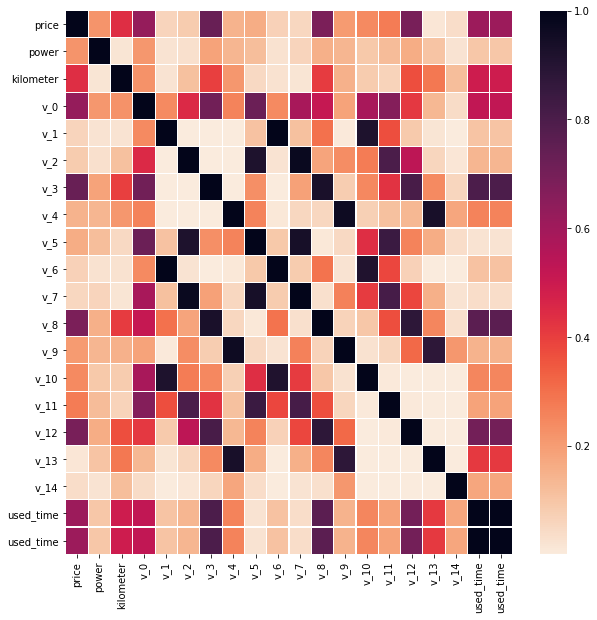

In [66]:
num_cols.append('used_time')
# corr1 = abs(df[~df['price'].isnull()][['price'] + num_cols].corr())
corr1 = abs(Train_data[['price'] + num_cols].corr())
plt.figure(figsize=(10, 10))
sns.heatmap(corr1, linewidths=0.1, cmap=sns.cm.rocket_r)

In [70]:
corr1

,price,power,kilometer,v_0,v_1,v_2,v_3,v_4,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14,used_time,used_time
price,1.000000,0.219834,0.440519,0.628397,0.060914,0.085322,0.730946,0.147085,0.164317,0.068970,0.053024,0.685798,0.206205,0.246175,0.275320,0.692823,0.013993,0.035911,0.612210,0.612210
power,0.219834,1.000000,0.019631,0.215028,0.023746,0.031487,0.185342,0.141013,0.119727,0.025648,0.060397,0.155956,0.140203,0.092717,0.122107,0.161990,0.103430,0.023808,0.097784,0.097784
kilometer,0.440519,0.019631,1.000000,0.225034,0.022228,0.110375,0.402502,0.214861,0.049502,0.024664,0.017835,0.407686,0.149422,0.083358,0.066542,0.370153,0.285158,0.120389,0.492577,0.492577
v_0,0.628397,0.215028,0.225034,1.000000,0.245049,0.452591,0.710480,0.259714,0.726250,0.243783,0.584363,0.514149,0.186243,0.582943,0.667809,0.415711,0.136938,0.039809,0.526311,0.526311
v_1,0.060914,0.023746,0.022228,0.245049,1.000000,0.001133,0.001915,0.000468,0.109303,0.999415,0.110806,0.298966,0.007698,0.921904,0.370445,0.087593,0.017349,0.002143,0.104380,0.104380
v_2,0.085322,0.031487,0.110375,0.452591,0.001133,1.000000,0.001224,0.001021,0.921857,0.023877,0.973689,0.180285,0.236164,0.274341,0.800915,0.535270,0.055376,0.013785,0.140761,0.140761
v_3,0.730946,0.185342,0.402502,0.710480,0.001915,0.001224,1.000000,0.001694,0.233412,0.000747,0.191278,0.933161,0.079292,0.247385,0.429777,0.811301,0.246052,0.058561,0.797270,0.797270
v_4,0.147085,0.141013,0.214861,0.259714,0.000468,0.001021,0.001694,1.000000,0.259739,0.011275,0.054241,0.051741,0.962928,0.071116,0.110660,0.134611,0.934580,0.178518,0.259750,0.259750
v_5,0.164317,0.119727,0.049502,0.726250,0.109303,0.921857,0.233412,0.259739,1.000000,0.091229,0.939385,0.010686,0.050343,0.440588,0.845954,0.258521,0.162689,0.037804,0.021975,0.021975
v_6,0.068970,0.025648,0.024664,0.243783,0.999415,0.023877,0.000747,0.011275,0.091229,1.000000,0.085410,0.294956,0.023057,0.917056,0.386446,0.070238,0.000758,0.003322,0.107702,0.107702


接下来看看15维匿名特征分别在训练集和测试集上的分布，如果发现分布不一致的，可以尝试处理。但是貌似这15维特征在训练集和测试集上的分布基本上都挺一致的，无论多奇怪的分布，两个数据集上都挺一致。¶

In [71]:
num_cols

['power',
 'kilometer',
 'v_0',
 'v_1',
 'v_2',
 'v_3',
 'v_4',
 'v_5',
 'v_6',
 'v_7',
 'v_8',
 'v_9',
 'v_10',
 'v_11',
 'v_12',
 'v_13',
 'v_14',
 'used_time',
 'used_time']

<Figure size 432x288 with 0 Axes>

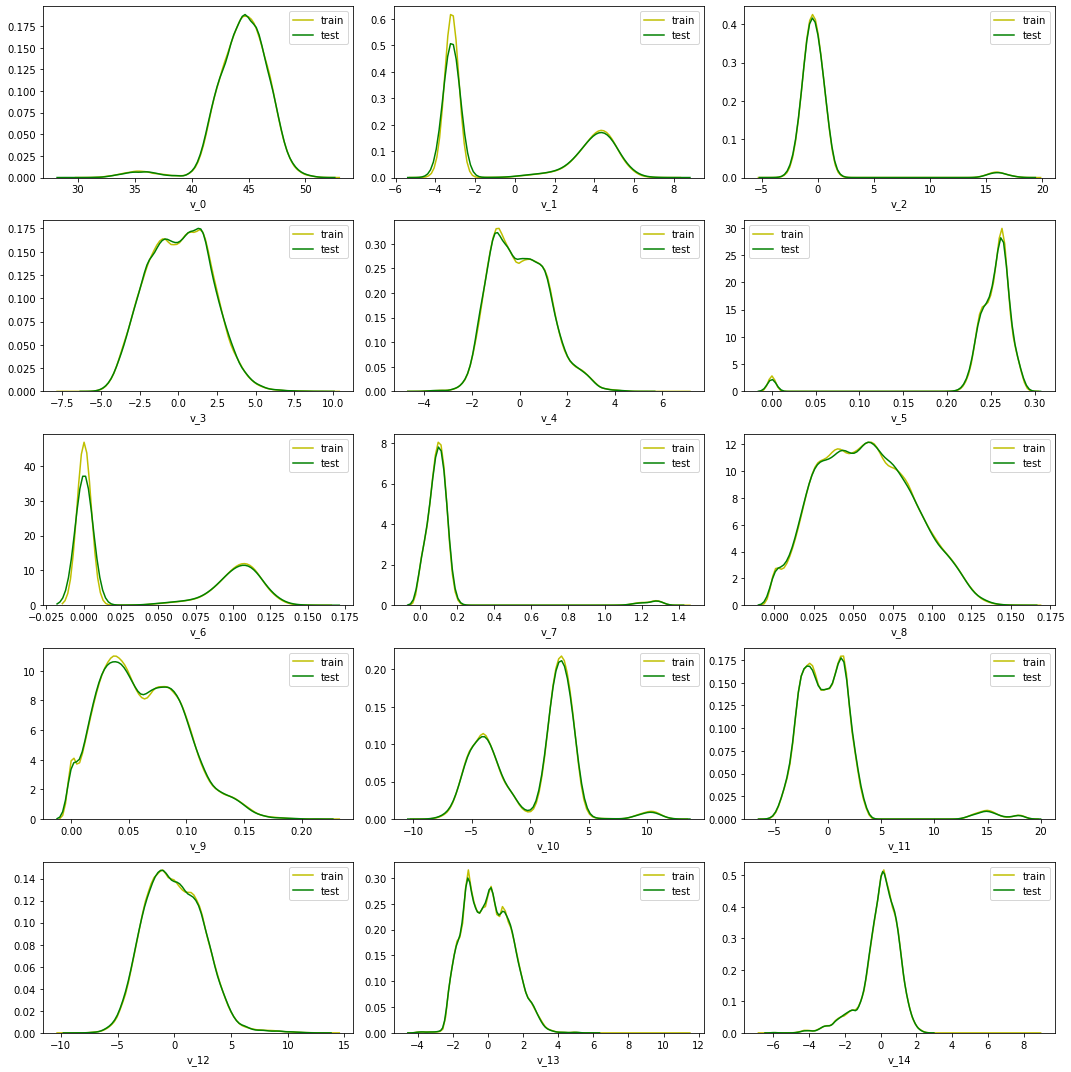

In [72]:
# 查看训练集和测试集匿名特征分布是否一致
plt.figure()
plt.figure(figsize=(15, 15))
i = 1
for f in num_cols[2:17]:
    plt.subplot(5, 3, i)
    i += 1
#     sns.distplot(df[~df['price'].isnull()][f], label='train', color='y', hist=False)
#     sns.distplot(df[df['price'].isnull()][f], label='test', color='g', hist=False)
    sns.distplot(Train_data[f], label='train', color='y', hist=False)
    sns.distplot(Test_data[f], label='test', color='g', hist=False)
plt.tight_layout()
plt.show()

In [83]:
num_cols.append('used_time')
for i in (num_cols+cate_cols):
    n = Train_data[i].nunique()
    print('{}特征的不同个数为{}'.format(i, n))

power特征的不同个数为566
kilometer特征的不同个数为13
v_0特征的不同个数为143997
v_1特征的不同个数为143998
v_2特征的不同个数为143997
v_3特征的不同个数为143998
v_4特征的不同个数为143998
v_5特征的不同个数为139624
v_6特征的不同个数为109766
v_7特征的不同个数为138709
v_8特征的不同个数为142451
v_9特征的不同个数为140617
v_10特征的不同个数为143997
v_11特征的不同个数为143997
v_12特征的不同个数为143997
v_13特征的不同个数为143998
v_14特征的不同个数为143998
used_time特征的不同个数为4405
name特征的不同个数为99662
model特征的不同个数为248
brand特征的不同个数为40
bodyType特征的不同个数为8
fuelType特征的不同个数为7
gearbox特征的不同个数为2
notRepairedDamage特征的不同个数为3
regionCode特征的不同个数为7905
seller特征的不同个数为2
offerType特征的不同个数为1


<Figure size 432x288 with 0 Axes>

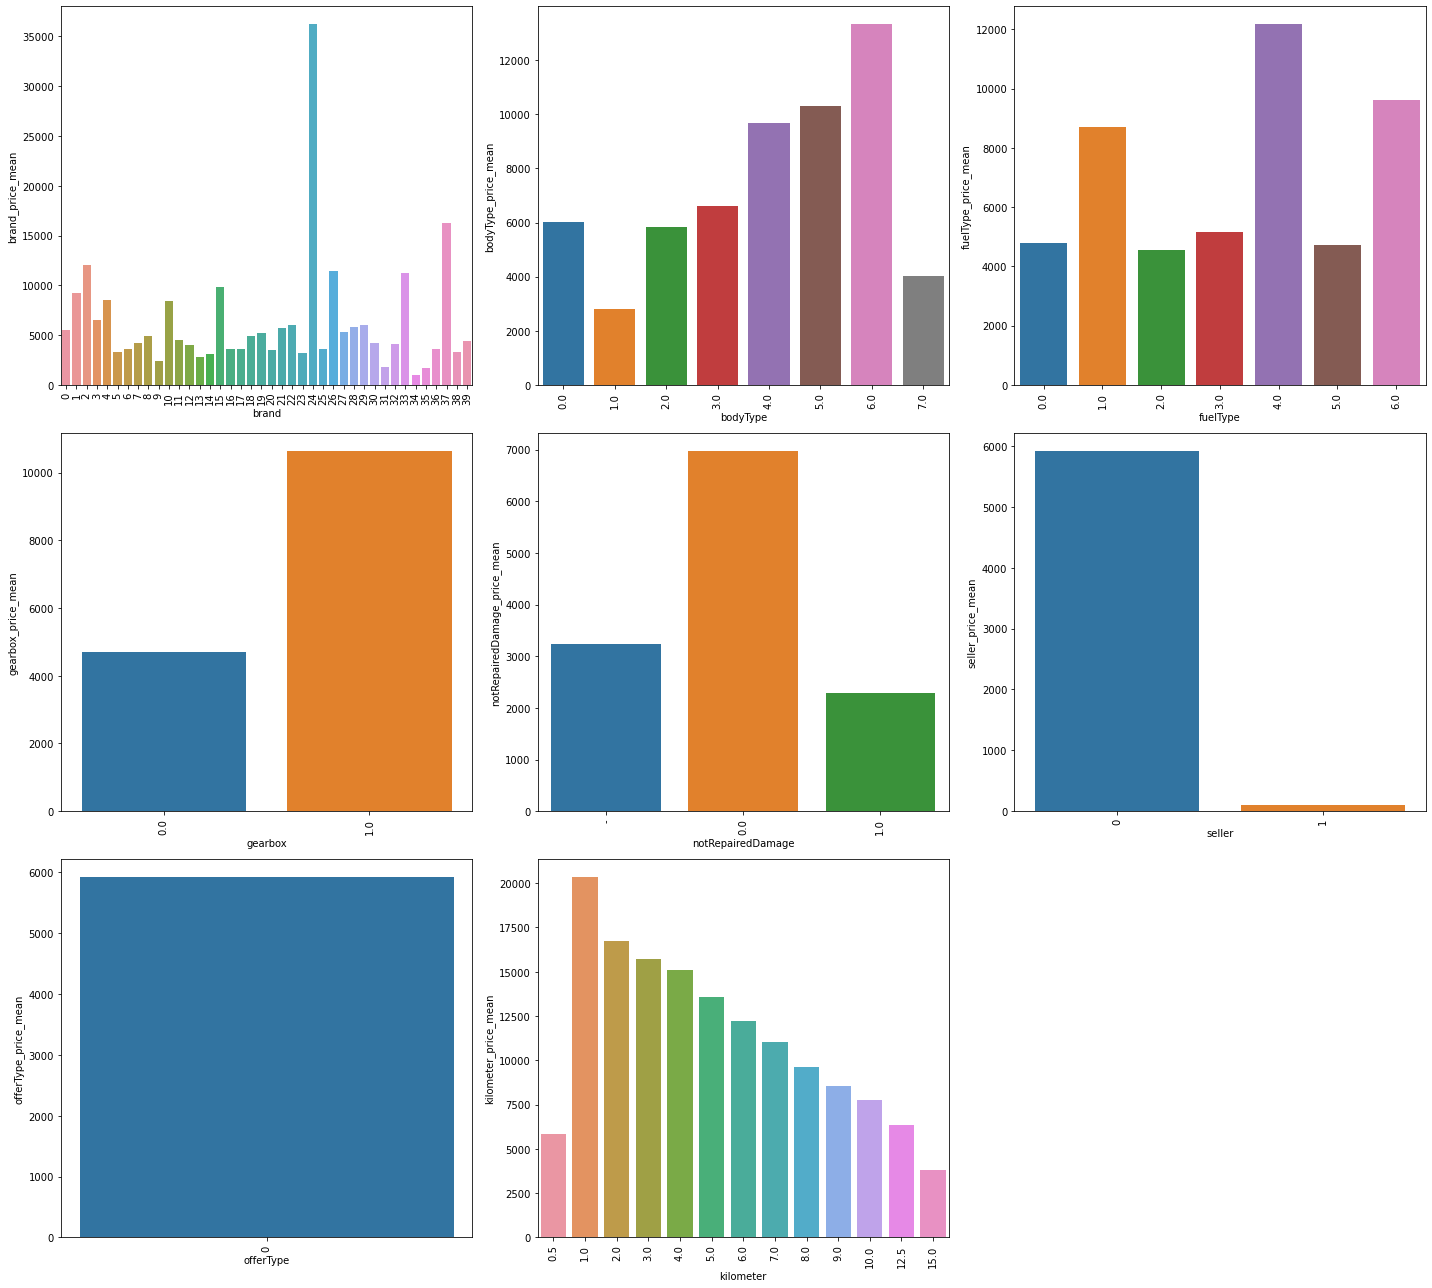

In [84]:
# 简单看几个n unique比较小的特征上面的price的均值的分布

plt.figure()
plt.figure(figsize=(20, 18))
i = 1
for f in cate_cols + num_cols:
    if Train_data[f].nunique() <= 50:
        plt.subplot(3, 3, i)
        i += 1
        v = Train_data.groupby(f)['price'].agg({f + '_price_mean': 'mean'}).reset_index()
        fig = sns.barplot(x=f, y=f + '_price_mean', data=v)
        for item in fig.get_xticklabels():
            item.set_rotation(90)
plt.tight_layout()
plt.show()

上图可以看出offerType和seller可以删除，kilometer与价格相关性高，继续查看个别特征

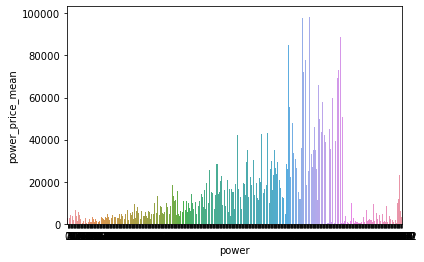

In [89]:
v = Train_data.groupby('power')['price'].agg({'power_price_mean': 'mean'}).reset_index()
sns.barplot(x='power', y='power_price_mean', data=v)
for item in fig.get_xticklabels():
    item.set_rotation(90)

特征工程：删除seller、offerType、name、用空值替换notRepairedDamage中的‘-’、邮编暂取前两位（代表省份）来研究、特征交叉（2阶。如：类别特征，选取与price相关性高的、、、特征融合、匿名特征相互之间.......、）

#独热编码
# 1、
pandas.get_dummies(data, prefix=None, prefix_sep='_', dummy_na=False, columns=None, sparse=False, drop_first=False)
data : array-like, Series, or DataFrame 
输入的数据
prefix : string, list of strings, or dict of strings, default None 
get_dummies转换后，列名的前缀 
*columns : list-like, default None 
指定需要实现类别转换的列名
dummy_na : bool, default False 
增加一列表示空缺值，如果False就忽略空缺值
drop_first : bool, default False 
获得k中的k-1个类别值，去除第一个
# 2、
from sklearn import preprocessing
enc = preprocessing.OneHotEncoder()
enc.fit([[0, 0, 3], [1, 1, 0], [0, 2, 1], [1, 0, 2]])    # fit来学习编码
enc.transform([[0, 1, 3]]).toarray()    # 进行编码
# 3、
from keras.utils import np_utils
y_train = np_utils.to_categorical(y_train,num_lasses=46)
46：特征数
#encode class values as integers
encoder = LabelEncoder()
encoded_Y = encoder.fit_transform(Y)
#convert integers to dummy variables (one hot encoding)
dummy_y = np_utils.to_categorical(encoded_Y)
